<a href="https://colab.research.google.com/github/KazGet/Yandex_smallpandas_course/blob/main/easy_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [ ]:
# @title 1 Task
"""
1. Всемирный доклад ООН о счастье содержит данные об опросе людей в разных странах, в котором они оценивают свой общий уровень счастья, а также уровне удовлетворения
в отдельных аспектах. В рамках сбора данных для репрезентативных национальных выборок респондентов просят ответить на ряд вопросов по шкале от нуля до десяти,
где десять — это лучшая из возможных жизней, а ноль — худшая. Ответы отдельных респондентов усредняются для получения общего для страны показателя.
Попробуем исследовать данные за 2019 год, чтобы лучше понять их структуру.

а) Какое максимальное и минимальное значение индекса счастья в 2019 году?
б) Какой средний уровень счастья среди всех стран?
в) Каков медианный уровень счастья среди всех стран?
г) Какова мода среди всех стран?
д) Каково стандартное отклонение среди всех стран?
е) Найдите десять самых счастливых стран.
ж) Подсчитайте суммарный ВВП всех стран.
з) Подсчитайте суммарный ВВП первых десяти стран.
"""
pd.set_option("display.max_columns", 10)
df = pd.read_csv("2019.csv")
print(df["Score"].max())
print(df["Score"].min())
print(df["Score"].mean())
print(df["Score"].median())
print(df['Score'].mode()[0])
print(df['Score'].std())
df_sort = df.sort_values(by="Score", ascending=False)
df_top10_country = df_sort.head(10)["Country or region"].tolist()
print(df_top10_country)
print(df['GDP per capita'].sum())
print(df['GDP per capita'][0:10].sum())

In [ ]:
# @title 2 Task
file = "/content/books_prep.csv"
df = pd.read_csv(file)

###Выведите имя самого популярного писателя в наборе данных
print(df['Author'].describe()['top'])

###Определите средние значения рейтинга для «дешёвых» и «дорогих» книг. Вам необходимо загрузить набор данных и напечатать средний рейтинг для «дорогих» книг.

AA = df[df['Price (Above Average)'] == 'Yes']
High = AA['User Rating'].mean()
print(round(High, 2))

###Проведите тест для определения равенства дисперсий. Выведите значение p-value.
from scipy.stats import levene
AA = df[df['Price (Above Average)'] == 'Yes']
High = AA['User Rating']
BB = df[df['Price (Above Average)'] == 'No']
Low = BB['User Rating']
print(levene(High, Low).pvalue.round(2))

###Проведите тест для определения равенства средних. Выведите значение p-value
from scipy.stats import ttest_ind, f_oneway
print(ttest_ind(High, Low).pvalue.round(2))

###Проведите тест ANOVA. Выведите значение p-value
groups = df.groupby("User Rating (Round)")["Reviews"].apply(list)

anova_result = f_oneway(*groups)
print(round(anova_result.pvalue, 2))

Тест Левена (равенство дисперсий)
p-value = 0.1

Так как p > 0.05, нет оснований отвергать гипотезу о равенстве дисперсий.

Значит, разброс оценок среди дорогих и дешёвых книг примерно одинаков.



t-тест (равенство средних значений рейтинга)
p-value = 0.0

Это меньше 0.05, значит различия между средними рейтингами статистически значимы.

Другими словами, стоимость книги влияет на её рейтинг.



ANOVA (влияние рейтинга на число рецензий)
p-value = 0.3

Значение больше 0.05, гипотеза о равенстве средних числа рецензий в разных группах рейтинга не отвергается.

Это означает, что число рецензий не зависит от округлённого рейтинга книги.

In [ ]:
# @title 3 Task
from statistics import mode
df =pd.read_csv("/content/COVID-19 SSR.csv")
"""
В датасете содержатся такие переменные как время на занятия, самостоятельное обучение, просмотр страниц в социальных сетях в день, а также
соц-демографические характеристики учащихся (возраст, регион проживания) и другие.
Вам необходимо вывести наиболее частый тип переменных встречаемый в датасете.
"""
z=[df[_].dtype for _ in df.columns]
print(mode(z))

"""
В датасете'COVID-19 SSR.csv' в переменной 'Rating of Online Class experience' все значения записаны символами верхнего регистра (Например, "GOOD").
Вам необходимо привести значения переменной 'Rating of Online Class experience' к значению "GOOD" с помощью функции title(). Например, df('Название переменной').str.title().
В выдаче выведите пять первых значения переменной 'Rating of Online Class experience'.
"""
df['Rating of Online Class experience']=df['Rating of Online Class experience'].str.title()
print(df['Rating of Online Class experience'].head(5))

"""
В нашем датасете есть переменная, указывающая на среднее количество сна в день ['Time spent on sleep'].
Для здорового человека нормально спать 7-8 часов. Но учащиеся могут спать больше или меньше необходимого времени сна.
То есть они могут спать например меньше 7 (6.9 часов) и больше 8 часов. Оптимальным количеством сна является 7-8 часов сна.
Вам необходимо вывести количество учащихся, которые спят больше или меньше оптимального времени для сна.
"""
df = pd.read_csv('/content/COVID-19 Survey Student Responses.csv')
w = df.query("not (`Time spent on sleep`> 6.9 and `Time spent on sleep`<9)").shape[0]
print(w)

"""
Мы обратим внимание на переменную 'Time spent on TV', которая содержит в себе не только числовые показатели, но и категориальные значения (object),
такие как "N", "n", "No tv". Для анализа переменной необходимо изменить другие значения помимо числовых на "0". Далее после обработки датасета выведите тип переменной.
"""
df['Time spent on TV'] = pd.to_numeric(df['Time spent on TV'], errors='coerce')
df['Time spent on TV'] = df['Time spent on TV'].fillna(0)
print(df['Time spent on TV'].dtype)

"""
Взаимосвязано ли количество сна и время, проведенное в социальных сетях?
Для ответа на данный вопрос мы будем работать с двумя переменными 'Time spent on sleep' и 'Time spent on social media'.
Мы хотим выяснить связано ли недосыпание учащихся с временем, проведенным ими в социальных сетях.
В начале перекодируйте переменные на бинарные категории: 'normal' и 'not normal'. Нормальное количество сна для людей – от 7 до 9 часов.
Нормальное время, проведенное в сети – это меньше 2 часов в день. Перекодируйте переменные, а затем воспользуйтесь результатом Хи-теста и выведите результат Хи-квадрата.
"""
from scipy.stats import chi2_contingency
df['Sleep'] = 'not normal'
df.loc[(df['Time spent on sleep'] >=7), 'Sleep'] = 'normal'
df['Media'] = 'not normal'
df.loc[df['Time spent on social media'] < 2, 'Media'] = 'normal'

contingency_table = pd.crosstab(df['Sleep'], df['Media'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(chi2)
print(p_value)


"""
Для удобной работы категориальные переменные перекодируют в числовые. В этой задаче мы будем работать с бинарной переменной 'Health issue during lockdown'.
Перекодируйте значения переменной "YES" и "NO", на "1" и "0", соответственно.
В выдаче выведите количество значений по данной переменной.
"""
df['Health issue during lockdown'] = (
    df['Health issue during lockdown'].replace({'YES': 1, 'NO': 0}).astype(int)

)
print(df['Health issue during lockdown'].value_counts())

"""
В этой задаче вы будете работать с переменной 'Stress busters'. Выведите количество учащихся,
которые используют книги в качестве профилактики борьбы со стрессом (встречаемость 'book' в значениях переменной).
"""
print(df['Stress busters'].str.contains('book', regex=False).sum())

"""
Определите наиболее популярную медиаплатформу в социальных сетях. (переменная 'Prefered social media platform')
Отфильтруйте пользователей, которые используют эту платформу для социальной сети и вычислите, в среднем сколько времени в
день проводят в социальных медиа (переменная 'Time spent on social media') пользователи, которые предпочитают популярную социальную платформу. Результат округлите до сотых.
"""

most_popular_media = mode(df['Prefered social media platform'])
filt = df['Time spent on social media'].loc[df['Prefered social media platform']==most_popular_media].mean().round(2)
print(filt)

"""
Определите платформу, в которой пользователи проводят больше всего времени в среднем.
Результат выведите через пробел. В начале укажите название предпочитаемой социальной сети, а затем среднее количество времени,
затрачиваемое на пользование социальными сетями через пробел. Результат округлите до сотых.
"""
mean_times = df.groupby('Prefered social media platform')['Time spent on social media'].mean()
max_platform = mean_times.idxmax()
max_time = mean_times.max()

print(f"{max_platform} {round(max_time, 2)}")

Axes(0.125,0.11;0.775x0.77)


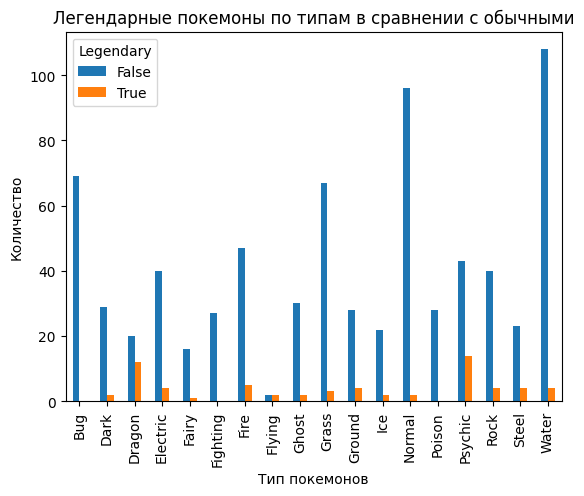

In [ ]:
#@title 4 Task
import matplotlib.pyplot as plt

df = pd.read_csv("/content/PokemonData.csv")
"""
Давайте попробуем визуализировать диапазон атаки покемонов, чтобы узнать пропорции «сильных» и «слабых».
 А также понять, какова примерная мода значений. В используемой базе данных переменная именуется Attack.
"""
# plt.hist(df["Attack"])
# plt.show()

"""
Давайте теперь попробуем отразить две шкалы на одном графике. Посмотрим, насколько сильно отличается распределения обычной атаки покемона
и его специальной атаки.
Правда ли, что специальная атака мощнее обычной базовой атаки? Показатели специальной атаки записаны в переменной SpAtk.
"""

# plt.hist(df["Attack"], alpha=0.5, label = 'Обычная атака')
# plt.hist(df["SpAtk"], alpha=0.5, label="Специальная атака")
# plt.xlabel('Мощность атаки')
# plt.ylabel('Количество покемонов')
# plt.legend()
# plt.show()

"""
Взглянем на соотношение стандартной атаки и стандартной защиты покемонов. Правда ли, что чем покемон сильнее, тем больше его защита?
Постройте точечную диаграмму, чтобы проверить это. Переменная с характеристикой атаки: 'Attack'. Переменная с характеристикой защиты: 'Defense'.
"""
# plt.scatter(df['Attack'], df['Defense'], alpha=0.3)
# plt.show()

"""
Визуализируем частоту наблюдений по типам покемонов. Информация о типаже покемона заложена в переменной 'Type1'.
Отразим частоту наблюдений по категориям с помощью столбчатой диаграммы.
"""
# df['Type1'].value_counts().plot(kind='bar')
# plt.show()

"""
Давайте внутри функции plot() переименуем оси и добавим название, чтобы было понятно, о чем наша визуализация.
За это отвечают параметры xlabel, ylabel, title. Пусть название оси Х будет "Тип покемонов", оси Y — "Количество",
а название –"Легендарные покемоны по типам в сравнении с обычными".
"""
print(df.groupby('Legendary')['Type1'].value_counts().unstack(0).plot(
    kind='bar', xlabel = 'Тип покемонов', ylabel = 'Количество', title = 'Легендарные покемоны по типам в сравнении с обычными'
    ))

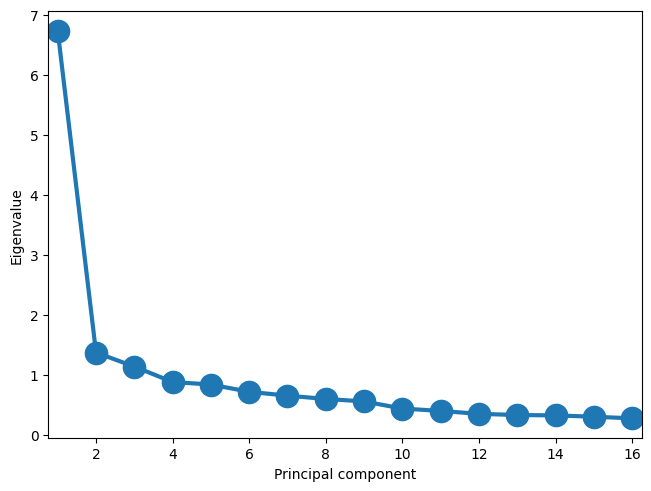

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


         first    second     third    fourth
V108  0.220949  0.227508  0.125863  0.276780
V109  0.147345  0.354425  0.091936  0.297278
V110  0.234577  0.231798  0.178381  0.739146
V111  0.195620  0.258944  0.171618  0.730537
V112  0.276735  0.171220  0.565347  0.210604
V113  0.189254  0.640520  0.193780  0.244847
V114  0.250646  0.679081  0.213182  0.203260
V115  0.229086  0.589156  0.340337  0.214478
V116  0.120432  0.263889  0.906908  0.127442
V117  0.306237  0.486868  0.409409  0.213911
V118  0.312803  0.383849  0.479410  0.185986
V119  0.550071  0.298363  0.130487  0.193020
V120  0.610771  0.265979  0.150999  0.197733
V121  0.530750  0.311098  0.128284  0.240175
V122  0.750848  0.123382  0.179472  0.129423
V123  0.691752  0.105002  0.165271  0.127352
['V119', 'V120', 'V121', 'V122', 'V123']
V108 V109 V117 V118
['V117']


In [35]:
# @title 5 Task
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
# !pip install psynlig
from psynlig import pca_scree

df = pd.read_csv("/content/WVSW 6 2010-2014.csv")
data = scale(df)

#Сколько вопросов попадают в первый фактор?
pca = PCA()
pca.fit_transform(data)
pca_scree(pca, marker='o', markersize=16, lw=3)
plt.show() #Ответ - кол - во точек, которые больше 1 по оси y. (4)

"""
В таблице факторных нагрузок, которая отражает корреляцию между фактором и переменной, все значения от 0.5 и выше мы будем считать достаточными для попадания в фактор.
"""
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(n_factors=4,rotation='varimax')
fa.fit(df)
factor_df=pd.DataFrame(fa.loadings_,index = df.columns)
factor_df = factor_df.rename(columns={0:'first', 1:'second', 2:'third', 3:'fourth'})
print(factor_df)

"""
В таблице факторных нагрузок, которая отражает корреляцию между фактором и переменной, все значения от 0.5 и выше мы будем считать достаточными для попадания в фактор.
Вам необходимо перечислить названия всех переменных, которые относятся к первому фактору.
"""

print(factor_df.query('first > 0.5').index.tolist())

#А теперь вам нужно вывести названия переменных, у которых во всех столбцах значение меньше 0,5.
sps = factor_df[(factor_df < 0.5).all(axis=1)].index.tolist()
print(' '.join(sps))

#Давайте изменим условие и определим, какие названия переменных при значении больше 0.4 относятся к двум факторам.
mask = (factor_df > 0.4)
rows_with_exactly_two = mask.sum(axis=1) == 2
filtered_df = factor_df[rows_with_exactly_two]
print(filtered_df.index.tolist())